In [1]:
import numpy as np

import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [1]:
pip install matplotlib==3.7.3


  Using cached matplotlib-3.7.3-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
Using cached matplotlib-3.7.3-cp311-cp311-win_amd64.whl (7.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
img = cv2.imread('./test_images/8e28dca199d2c529e710f2fc7550fc85.jpg')

In [3]:
img.shape

(612, 408, 3)

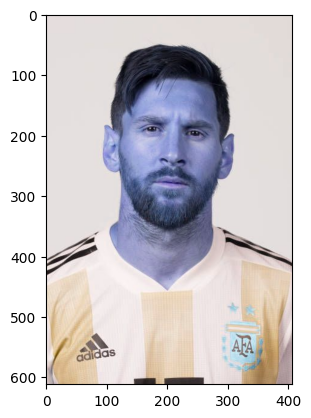

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(612, 408)

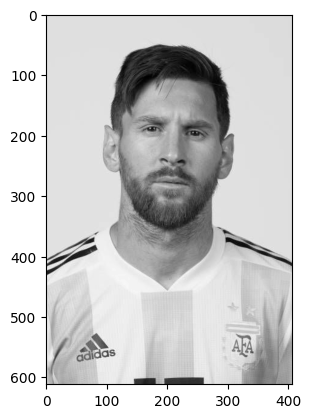

In [6]:
plt.imshow(gray, cmap = 'gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

In [8]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces
        # X, y, width and height
# array([[352,  38, 233, 233]]) 

array([[103, 108, 211, 211]])

In [9]:
x, y, w, h = faces[0]
x,y,w,h

(103, 108, 211, 211)

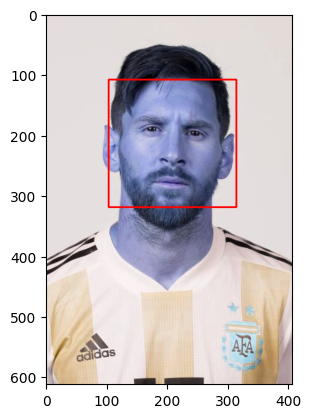

In [10]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0, 0),2)
plt.imshow(face_img)

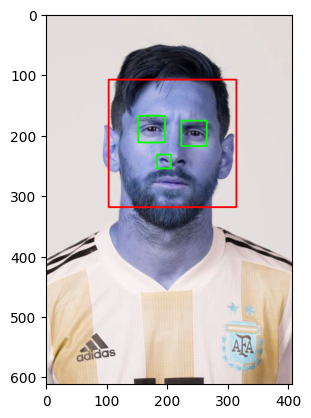

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0 , 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes  =eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey), (ex+ew, ey+eh), (0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap = 'gray')
plt.show()

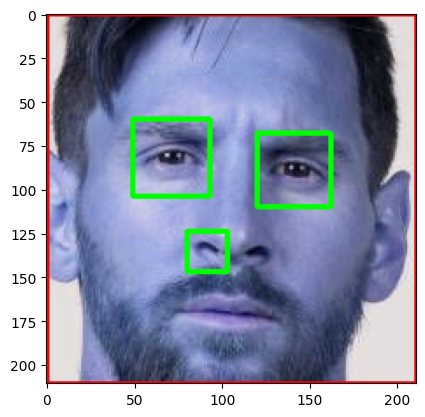

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap= 'gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)  # Load image

    gray  =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #Change Color into gray
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+w, x:x+w]
        eyes  =eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [14]:
img_cropped = get_cropped_image_if_2_eyes('./test_images/28003-1510231943.jpg')

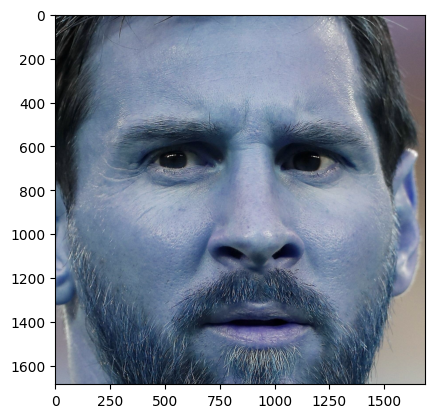

In [15]:
plt.imshow(img_cropped)

In [16]:
path_img_sv = "./PathWhereYouStoreYourDataSet/dataset/"
path_img_cropped = "./PathWhereYouStoreYourDataSet/dataset/PickYourFolderName(ItCanBeAnythin)/"

In [17]:
import os  #Getting all file in dir ./dataset
img_dirs = [] 
for entry in os.scandir(path_img_sv):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cristiano_ronaldo',
 './sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/lionel_messi',
 './sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/maria_sharapova',
 './sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/roger_federer',
 './sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/serena_williams']

In [19]:
import shutil   #See if the cropped file exist, 
if os.path.exists(path_img_cropped):
    shutil.rmtree(path_img_cropped)
os.mkdir(path_img_cropped)

In [19]:



cropped_img_dir = []
sport_celeb_name_dict = {}


for img_file in img_dirs:
    count = 1
    celeb_name = img_file.split('/')[-1]
    print(celeb_name)

    sport_celeb_name_dict[celeb_name] = []

    for entry in os.scandir(img_file):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_img_cropped + celeb_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dir.append(cropped_folder)
                print('Generating cropped images in folder : ' , cropped_folder)

            cropped_file_name = celeb_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            sport_celeb_name_dict[celeb_name].append(cropped_file_path)
            count +=1
            

cristiano_ronaldo
Generating cropped images in folder :  ./sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cropp/cristiano_ronaldo
lionel_messi
Generating cropped images in folder :  ./sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cropp/lionel_messi
maria_sharapova
Generating cropped images in folder :  ./sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cropp/maria_sharapova
roger_federer
Generating cropped images in folder :  ./sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cropp/roger_federer
serena_williams
Generating cropped images in folder :  ./sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cropp/serena_williams


In [20]:
sport_celeb_name_dict = {}
for file in cropped_img_dir:
    celebrit_name = file.split('/')[-1]
    file_list = []
    for img in os.scandir(file):
        file_list.append(img.path)
    sport_celeb_name_dict[celebrit_name] = file_list
sport_celeb_name_dict

{'cristiano_ronaldo': ['./sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cropp/cristiano_ronaldo\\cristiano_ronaldo1.png',
  './sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cropp/cristiano_ronaldo\\cristiano_ronaldo10.png',
  './sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cropp/cristiano_ronaldo\\cristiano_ronaldo11.png',
  './sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cropp/cristiano_ronaldo\\cristiano_ronaldo12.png',
  './sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cropp/cristiano_ronaldo\\cristiano_ronaldo13.png',
  './sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cropp/cristiano_ronaldo\\cristiano_ronaldo14.png',
  './sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cropp/cristiano_ronaldo\\cristiano_ronaldo15.png',
  './sport-repo/DataScience/CelebrityFaceRecognition/model/dataset/cropp/cristiano_ronaldo\\cristiano_ronaldo16.png',
  './sport-repo/DataScience/Celebrit

#### Optional for debugging


In [44]:
img_folder = "./dataset/cristiano_ronaldo"

def check_images (image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load this img: {image_path}")
        return False
    try:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        return True
    except cv2.error as e:
        print (f" Error conveting this img: {image_path} : {e}")
        return False

for img in os.scandir(img_folder):
    check_images(img.path)

In [21]:
import pywt

def w2d(img, mode = 'haar', level = 1):
    imArray  =img
    #Datatype coversion
    imArray  = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)

    imArray = np.float32(imArray)
    imArray /= 255.0

    coeffs = pywt.wavedec2(imArray, mode, level=level)

    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

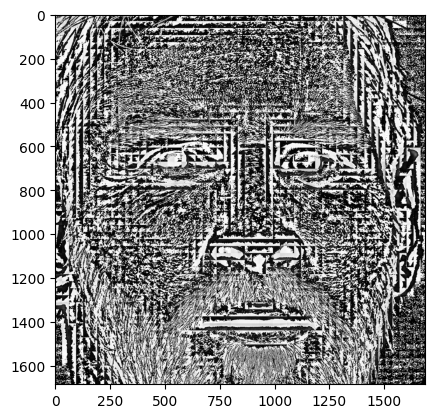

In [22]:
im_har  =w2d(img_cropped, 'db1', 5)
plt.imshow(im_har, cmap ='gray')

In [23]:
class_dict = {}
count = 0

for celebrity_name in sport_celeb_name_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4}

In [24]:
X , y=[], []


for celeb_name, training_files in sport_celeb_name_dict.items():
    for training_img in training_files:
        img = cv2.imread(training_img)
        scalled_raw_img = cv2.resize(img, (32,32))
        image_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(image_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celeb_name])

In [25]:
len(X[0]) # 4096 because 32*32*3 + 32*32 ( Color img stack on top of no-colorimg)

4096

In [26]:
len(X)

159

In [27]:
X = np.array(X).reshape(len(X), 4096).astype(float)

## Train Model

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [30]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('svc', SVC(kernel = 'rbf', C = 10))
                ])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.875

In [31]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.86      0.75      0.80         8
           2       0.89      0.89      0.89         9
           3       0.80      1.00      0.89         4
           4       0.89      1.00      0.94         8

    accuracy                           0.88        40
   macro avg       0.87      0.89      0.88        40
weighted avg       0.88      0.88      0.87        40



In [32]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [33]:
model_params  ={
    'svm': {
        'model': svm.SVC( probability = True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf', 'linear'],
            'svc__gamma': [0.001, 0.0001],
            
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(random_state = 42),
        'params': {
            'randomforestclassifier__n_estimators': [10, 25, 50],
            'randomforestclassifier__max_depth': [10, 20, 30],
            'randomforestclassifier__max_leaf_nodes': [10, 20, 30],
            'randomforestclassifier__min_samples_leaf': [1,2, 4]
            
        }
        
    },
    'logistic_regression':{
        'model': LogisticRegression(solver = 'liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [0.01, 0.1, 1, 10, 100],
            
        }
        
    }
}

In [34]:
import pandas as pd
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv = 5, return_train_score  = False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df



,model,best_score,best_params
0,svm,0.722464,"{'svc__C': 1, 'svc__gamma': 0.001, 'svc__kerne..."
1,random_forest,0.688768,"{'randomforestclassifier__max_depth': 10, 'ran..."
2,logistic_regression,0.739130,{'logisticregression__C': 0.1}


In [ ]:
# The dataframe above is the score of validation set not the test set

In [35]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma=0.001, kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(max_depth=10, max_leaf_nodes=20,
                                         min_samples_leaf=2, n_estimators=50,
                                         random_state=42))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=0.1, solver='liblinear'))])}

In [36]:
best_estimators['svm'].score(X_test, y_test)

0.95

In [37]:
best_estimators['random_forest'].score(X_test, y_test)

0.75

In [38]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.95

In [39]:
best_clf = best_estimators['svm']

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  1,  0,  0,  0],
       [ 0,  7,  1,  0,  0],
       [ 0,  0,  9,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

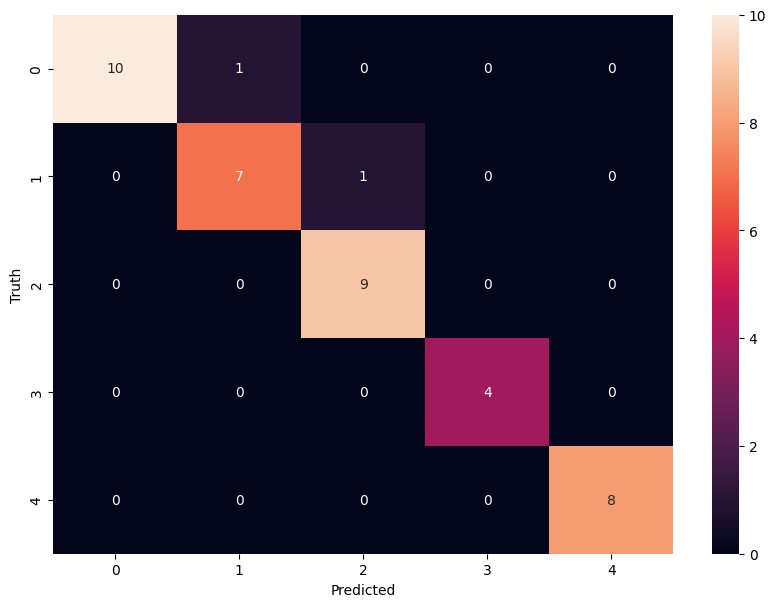

In [41]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
class_dict

{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4}

In [43]:
!pip install joblib


In [44]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [45]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))